# [0] 모듈, 데이터 업로드

In [ ]:
# 코랩
# 한글 폰트 설치 및 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [14]:
# 데이터분석용
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
from IPython.display import Image
import glob


# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

warnings.filterwarnings(action='ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("data/final_data.csv", encoding = 'utf-8')

In [7]:
data.columns

Index(['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'SLS_GRD',
       'bus_counts', 'subway_counts', 'sisul_counts', 'apt_doors_counts',
       'snp_price_score', 'fpop_score', 'sns_score', '공시지가', '횡단보도갯수',
       '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지',
       '초미세먼지', '상권_변화_지표', '상권_변화_지표_명', '운영_영업_개월_평균', '폐업_영업_개월_평균',
       '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균', '월별코로나환자수', '유동인구상가공급',
       '배후지인구당상가면적', '젠트리피케이션위험지수', '배후지_총_상주인구_수', '배후지_남성_상주인구_수',
       '배후지_여성_상주인구_수', '배후지_총_가구_수', '배후지_아파트_가구_수', '배후지_비_아파트_가구_수',
       '배후지_총_생활인구_수', '배후지_남성_생활인구_수', '배후지_여성_생활인구_수', '배후지_월_평균_소득_금액',
       '배후지_소득_구간_코드', '배후지_지출_총금액', '배후지_식료품_지출_총금액', '배후지_점포_수',
       '배후지_유사_업종_점포_수', '배후지_개업_율', '배후지_개업_점포_수', '배후지_폐업_률', '배후지_폐업_점포_수',
       '배후지_프랜차이즈_점포_수', '배후지_총_직장_인구_수', '배후지_남성_직장_인구_수', '배후지_여성_직장_인구_수',
       '배후지_분기당_매출_금액', '배후지_분기당_매출_건수', '배후지_주중_매출_비율', '배후지_주말_매출_비율',
       '배후지_집객시설_수', '상권_월_평균_소득_금액', '상권_지출_총금액', '

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 88 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   DATA_CRTR_YM      1156040 non-null  int64  
 1   LT_UNQ_NO         1156040 non-null  int64  
 2   STDG_EMD_CD       1156040 non-null  int64  
 3   INDUSTRY_CD       1156040 non-null  object 
 4   SLS_GRD           1156040 non-null  int64  
 5   bus_counts        1156040 non-null  int64  
 6   subway_counts     1156040 non-null  int64  
 7   sisul_counts      1156040 non-null  int64  
 8   apt_doors_counts  1156040 non-null  int64  
 9   snp_price_score   915337 non-null   float64
 10  fpop_score        1076491 non-null  float64
 11  sns_score         1106644 non-null  float64
 12  공시지가              866925 non-null   float64
 13  횡단보도갯수            1140098 non-null  float64
 14  이산화질소농도(ppm)      1156040 non-null  float64
 15  오존농도(ppm)         1156040 non-null  float64
 16  

In [ ]:
pd.options.display.max_rows = 1000
data.head(5).T

,0,1,2,3,4
DATA_CRTR_YM,202201,202201,202201,202201,202201
LT_UNQ_NO,1111010100100030100,1111010100100480000,1111010100100590001,1111010100100590005,1111010100100690000
STDG_EMD_CD,11110101,11110101,11110101,11110101,11110101
INDUSTRY_CD,A03,A01,A11,A03,A01
SLS_GRD,4,2,3,2,2
bus_counts,8,8,8,8,8
subway_counts,0,0,0,0,0
sisul_counts,4,2,2,2,2
apt_doors_counts,0,0,0,0,0
snp_price_score,NaN,73.91,64.25,71.8,79.38


In [ ]:
# 상관관계 계산
correlation_matrix = data.corr()

In [ ]:
# 예시
#pd.options.display.float_format = '{:.5f}'.format
#correlation_matrix['DATA_CRTR_YM'].sort_values()[correlation_matrix['DATA_CRTR_YM'].sort_values() >= 0.5]

In [ ]:
corr_df = correlation_matrix

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

def find_corr(column_name) : # 해당변수와 0.5이상의 상관관계를 가지는 피처와 상관계수 추출

    return correlation_matrix[f'{column_name}'].sort_values()[correlation_matrix[f'{column_name}'].sort_values() >= 0.5]

find_corr('DATA_CRTR_YM')

서울_폐업_영업_개월_평균   0.86832
서울_운영_영업_개월_평균   0.95451
DATA_CRTR_YM     1.00000
Name: DATA_CRTR_YM, dtype: float64

# [1] Target값 분포 확인

In [8]:
tmp = data.groupby(['SLS_GRD']).agg({'LT_UNQ_NO':'count'}).reset_index()
tmp

,SLS_GRD,LT_UNQ_NO
0,1,115692
1,2,288955
2,3,346757
3,4,288963
4,5,115673


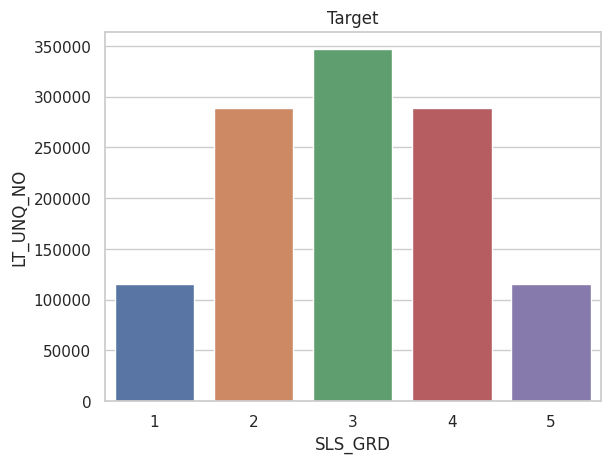

In [10]:
# 불균형한 분포
# 1등급과 5등급은 갯수가 적은만큼 확실히 분류해줄 수 있는 지표가 필요함
sns.barplot(data=tmp, x="SLS_GRD", y="LT_UNQ_NO").set(title="Target")
plt.show()

# [+] 지역구별 등급 평균 확인

In [ ]:
data['구'] = data['LT_UNQ_NO'].astype('str').str[:5]
data['구']

0          11110
1          11110
2          11110
3          11110
4          11110
           ...  
1156035    11740
1156036    11740
1156037    11740
1156038    11740
1156039    11740
Name: 구, Length: 1156040, dtype: object

In [ ]:
!pip install PublicDataReader --upgrade
import PublicDataReader as pdr # 공공데이터 라이브러리
# 법정동 코드를 조회할 수 있는 공공데이터 호출
법정동코드 = pdr.code_bdong()
seoul_df = 법정동코드[법정동코드['시도명'] =='서울특별시']
seoul_df.head()

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023. 7. 3. 시행)


,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,,19880423,
2,11,서울특별시,11110,종로구,1111010100,청운동,,19880423,
3,11,서울특별시,11110,종로구,1111010200,신교동,,19880423,
4,11,서울특별시,11110,종로구,1111010300,궁정동,,19880423,


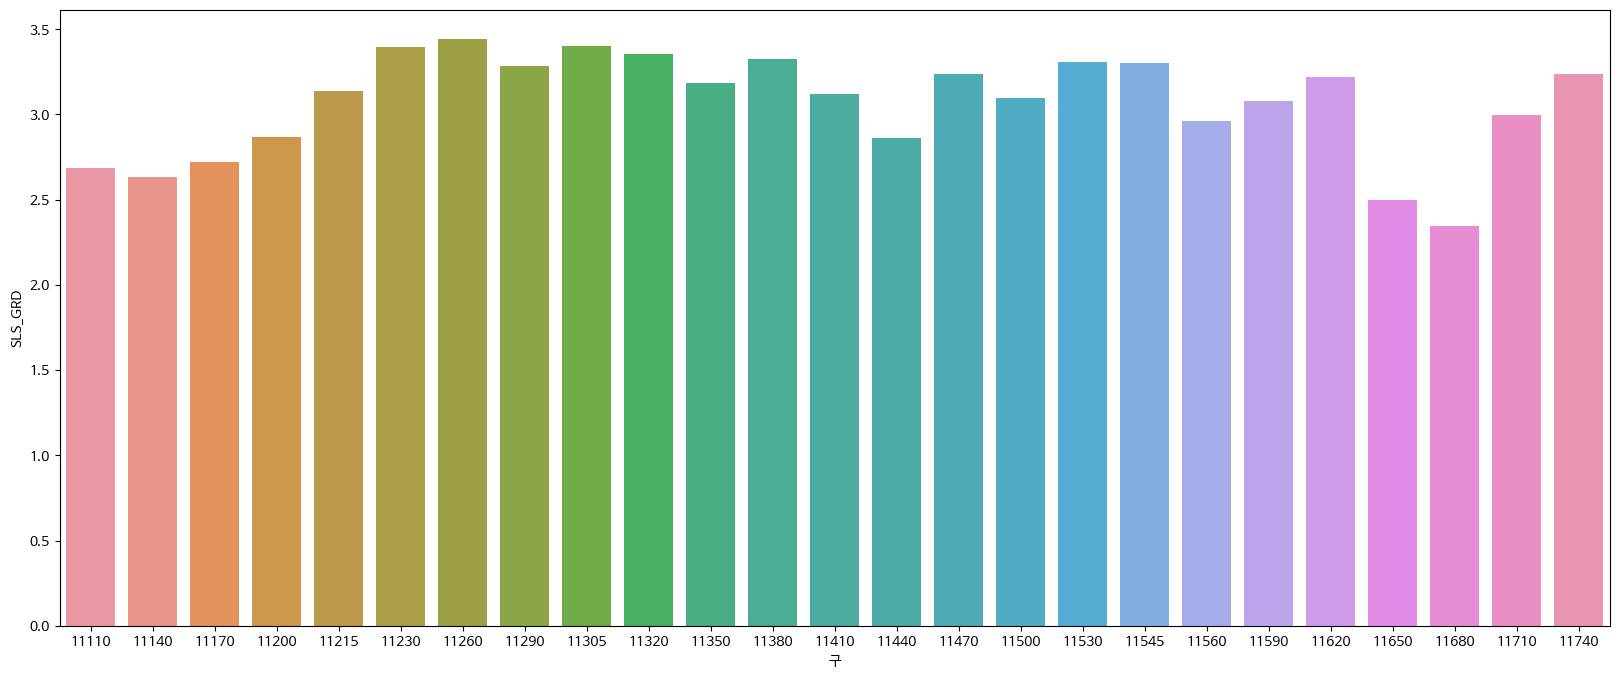

In [ ]:
tmp = data.groupby(['구']).agg({'SLS_GRD':'mean'}).reset_index()
# 불균형한 분포
fig, _ = plt.subplots(figsize=(20, 8))


sns.barplot(data=tmp, x="구", y="SLS_GRD")

plt.show()

In [ ]:
seoul_df_unique = seoul_df.drop_duplicates(['시군구코드']).reset_index().drop(['index'], axis = 1)
seoul_df_unique.head(2)

,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,,19880423,


In [ ]:
tmp = pd.merge(tmp, seoul_df_unique, how='left', left_on='구', right_on = '시군구코드')
tmp = tmp.sort_values(by = 'SLS_GRD')
tmp.head(3)

,구,SLS_GRD,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
22,11680,2.34441,11,서울특별시,11680,강남구,1168000000,,,19880423,
21,11650,2.49720,11,서울특별시,11650,서초구,1165000000,,,19880423,
1,11140,2.63228,11,서울특별시,11140,중구,1114000000,,,19880423,


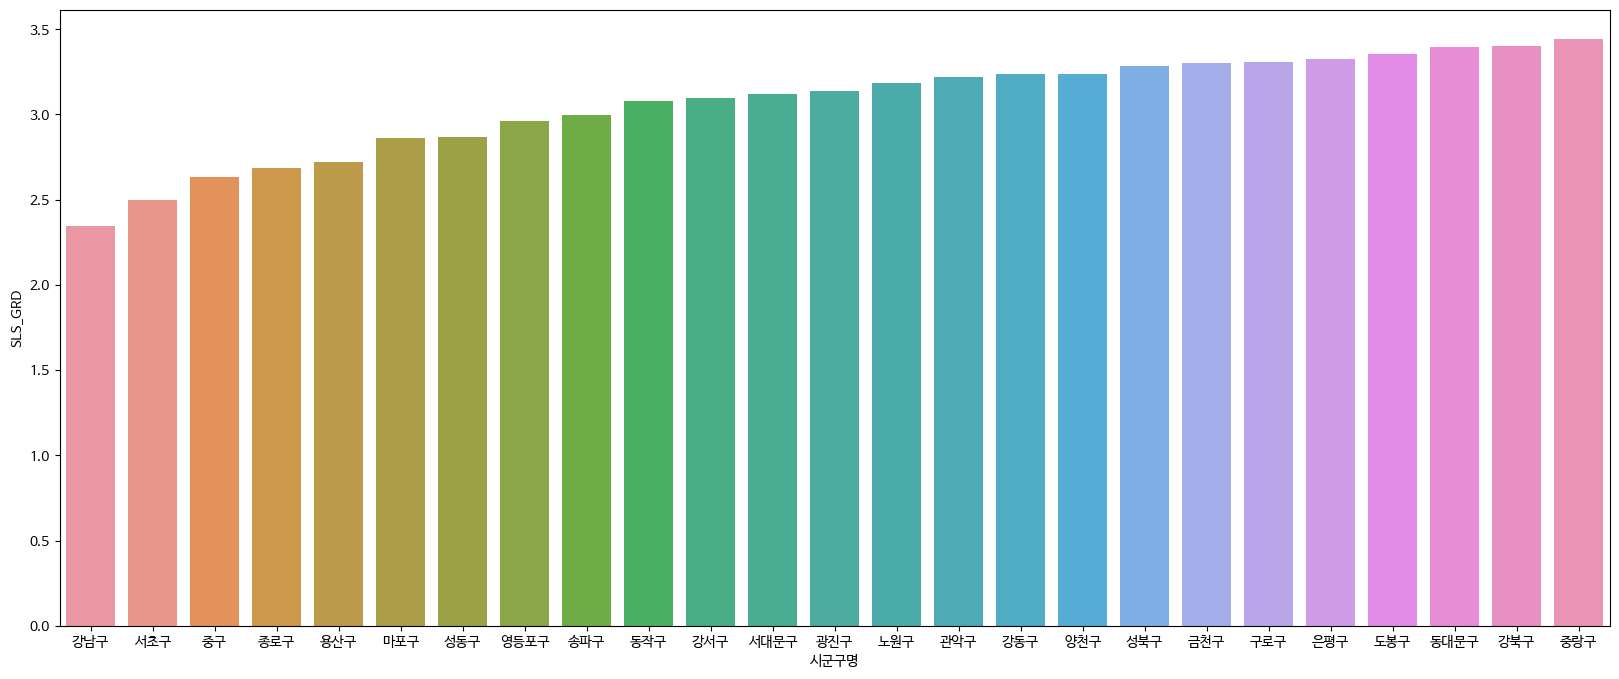

In [ ]:
tmp = data.groupby(['구']).agg({'SLS_GRD':'mean'}).reset_index()
tmp = pd.merge(tmp, seoul_df_unique, how='left', left_on='구', right_on = '시군구코드')
tmp = tmp.sort_values(by = 'SLS_GRD')
# 구별로 평균 등급 => 낮을수록 안정적인 지표임
fig, _ = plt.subplots(figsize=(20, 8))

sns.barplot(data=tmp, x="시군구명", y="SLS_GRD")

plt.show()

# [+] 업종별 분포 확인 및 평균 등급 확인

# [+] bus, subway, sisul 인구데이터와 결합하여 피처 생성 (9개)
- 횡단보도갯수, 공시지가

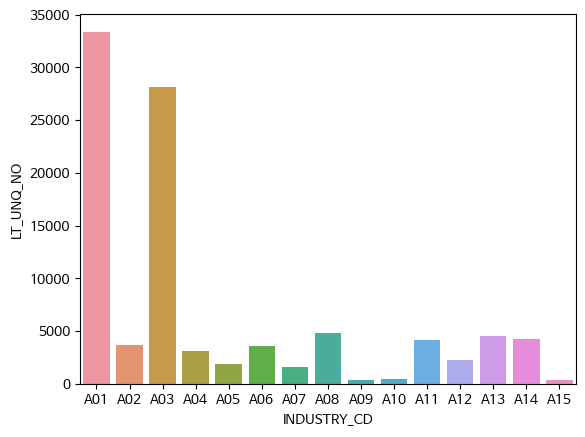

In [ ]:
# 업종별 분포가 상당히 불균형하다
tmp = data.groupby(['INDUSTRY_CD']).agg({'LT_UNQ_NO':'count'}).reset_index()#.sort_values(by = 'LT_UNQ_NO')
tmp['LT_UNQ_NO'] = tmp['LT_UNQ_NO'] / 12 # 대부분 각 월별로 데이터를 가지고 있다는 가정하에
sns.barplot(data=tmp, x="INDUSTRY_CD", y="LT_UNQ_NO")
plt.show()

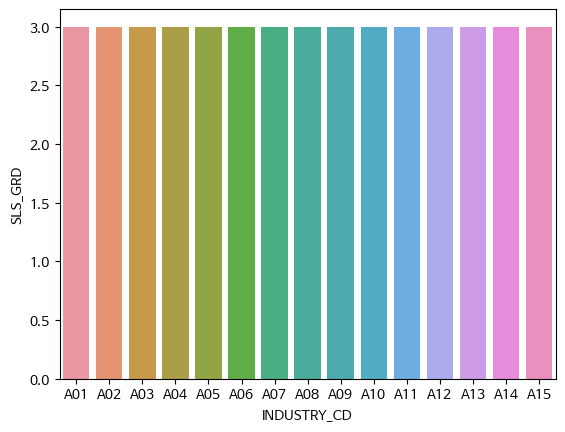

In [ ]:
# 업종별 매출 평균은 거의 유사하다
tmp = data.groupby(['INDUSTRY_CD']).agg({'SLS_GRD':'mean'}).reset_index()#.sort_values(by = 'SLS_GRD')

sns.barplot(data=tmp, x="INDUSTRY_CD", y="SLS_GRD")



plt.show()

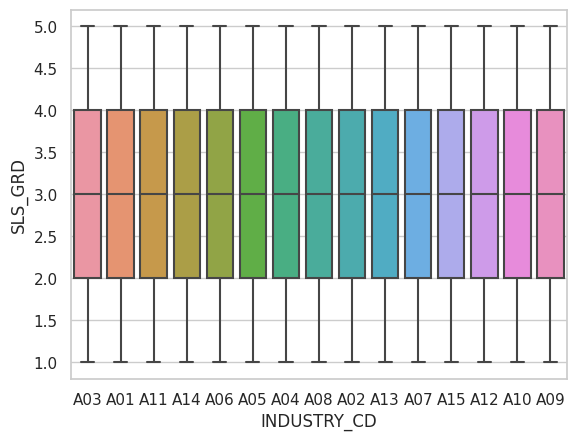

In [11]:
# 업종별 등급 분포가 거의 유사하다.
#tmp = data.groupby(['INDUSTRY_CD']).agg({'SLS_GRD':'mean'}).reset_index()#.sort_values(by = 'SLS_GRD')

sns.boxplot(data=data, x="INDUSTRY_CD", y="SLS_GRD")

plt.show()

# [2] bus_counts

In [ ]:
a = data.groupby(['SLS_GRD']).agg({'bus_counts':'mean'}).reset_index()
a

,SLS_GRD,bus_counts
0,1,25.13638
1,2,25.57309
2,3,25.63272
3,4,25.71798
4,5,25.73823


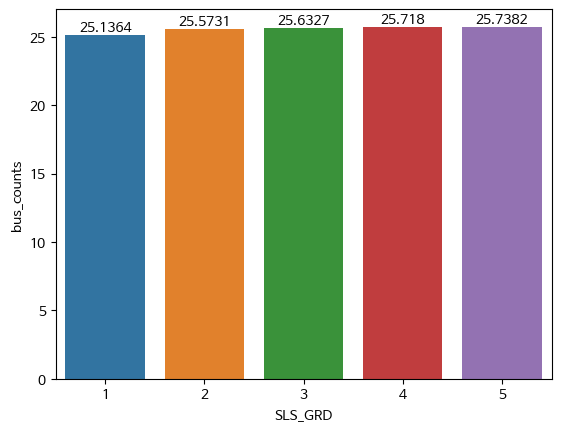

In [ ]:
# 피처중요도는 매우 높지만, 분류값별 평균 차이는 크지 않다. 하지만 등급이 높아질수록(불안정할수록) 높아질수록 평균 버스정류장 갯수는 조금씩 높아지고 있다.
ax = sns.barplot(data=a, x="SLS_GRD", y="bus_counts")

ax.bar_label(ax.containers[0])

plt.show()

## [2-1] 버스_상권집객시설수( bus_counts / 상권_집객시설_수 )    **<사용>**

In [ ]:
data['버스_상권집객시설수'] = data['bus_counts'] / data['상권_집객시설_수']

In [ ]:
tmp = data.groupby(['SLS_GRD']).agg({'버스_상권집객시설수':'mean'}).reset_index()

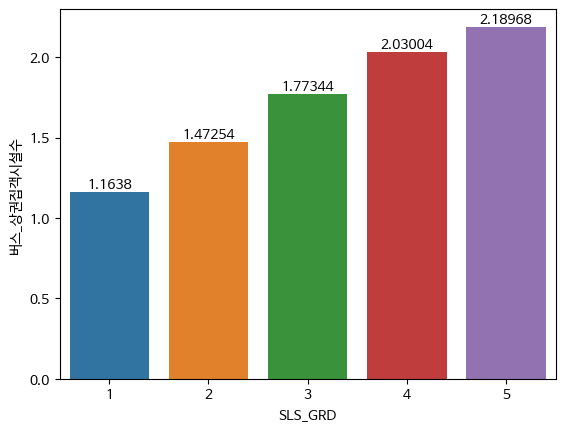

In [ ]:
# 버스정류장을 상권 집객시설수로 나눴을 때 그 차이가 더욱 두드러진다.
ax = sns.barplot(data=tmp, x="SLS_GRD", y="버스_상권집객시설수")
ax.bar_label(ax.containers[0])

#sns

plt.show()

## [2-2] 버스_상권상주인구수 (bus_counts / 상권_총 상주인구 수)  **<사용>**

In [ ]:
data['버스_상권상주인구수'] = data['bus_counts'] / data['상권_총 상주인구 수']

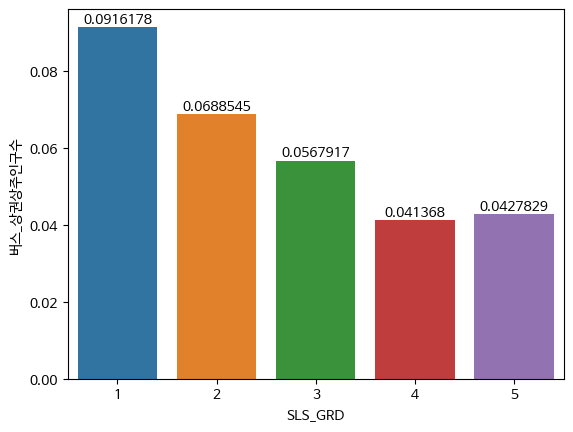

In [ ]:
# 시설수를 나눴을 때와 반대의 양상이 나타난다.
tmp = data.groupby(['SLS_GRD']).agg({'버스_상권상주인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="버스_상권상주인구수")
ax.bar_label(ax.containers[0])

plt.show()

## [2-3] 버스_상권생활인구수 (bus_counts / 상권_총_생활인구_수) **<사용>**

In [ ]:
data['버스_상권생활인구수'] = data['bus_counts'] / data['상권_총_생활인구_수']

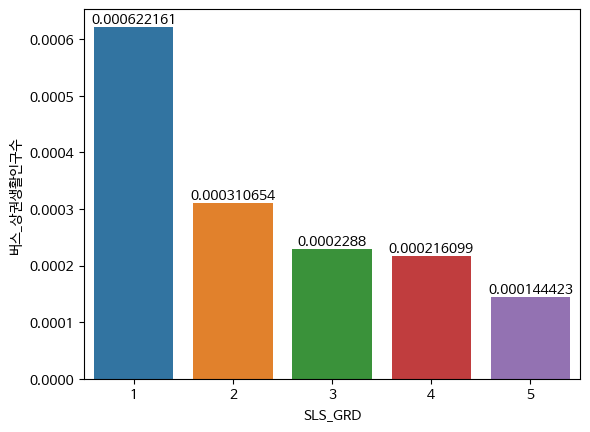

In [ ]:
# 상주인구수를 나눴을때보다 1번 타겟값의 차이가 두드러지지만, 등급에 따른 순서는 상주인구수로 나누었을때와 유사함
tmp = data.groupby(['SLS_GRD']).agg({'버스_상권생활인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="버스_상권생활인구수")
ax.bar_label(ax.containers[0])

plt.show()

# [3] subway_counts

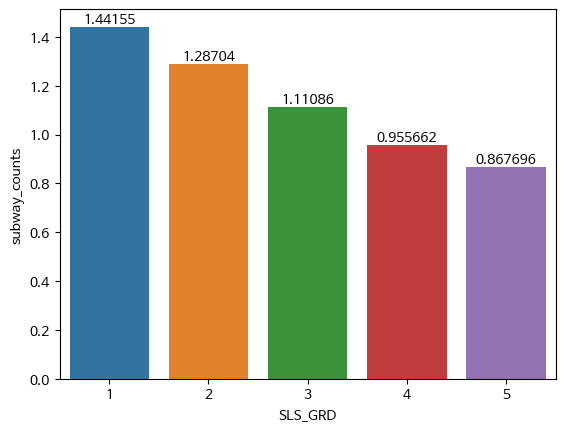

In [ ]:
a = data.groupby(['SLS_GRD']).agg({'subway_counts':'mean'}).reset_index()
# 버스 정류장 갯수와는 정반대의 양상을 보이고 있으며, 그 차이도 더욱 뚜렷하다.
ax = sns.barplot(data=a, x="SLS_GRD", y="subway_counts")

ax.bar_label(ax.containers[0])

plt.show()

## [3-1] 지하철_상권집객시설수 (subway_counts / 상권_집객시설_수)  **<사용>**

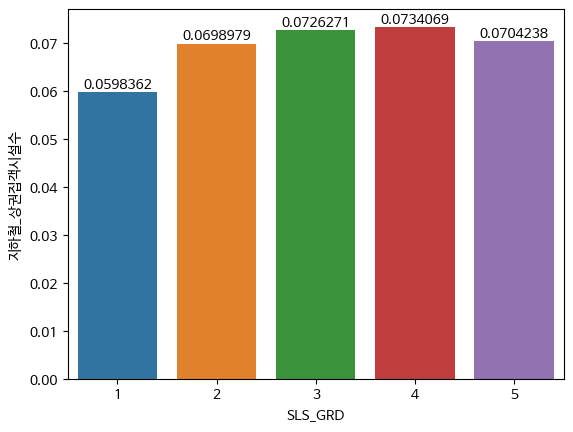

In [ ]:
# 지하철을 상권집객시설수로 나누자 2,3,4 등급의 값들이 높은 수치를 보이고 있음

data['지하철_상권집객시설수'] = data['subway_counts'] / data['상권_집객시설_수']
tmp = data.groupby(['SLS_GRD']).agg({'지하철_상권집객시설수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="지하철_상권집객시설수")
ax.bar_label(ax.containers[0])

plt.show()

## [3-2] 지하철_상권상주인구수 (subway_counts / 상권_총 상주인구 수)  **<사용>**

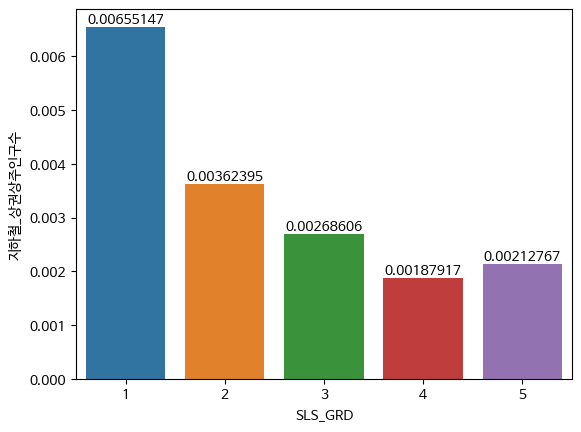

In [ ]:
#
data['지하철_상권상주인구수'] = data['subway_counts'] / data['상권_총 상주인구 수']
tmp = data.groupby(['SLS_GRD']).agg({'지하철_상권상주인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="지하철_상권상주인구수")
ax.bar_label(ax.containers[0])

plt.show()

## [3-3] 지하철_상권생활인구수 (subway_counts / 상권_총_생활인구_수)  **<사용>**

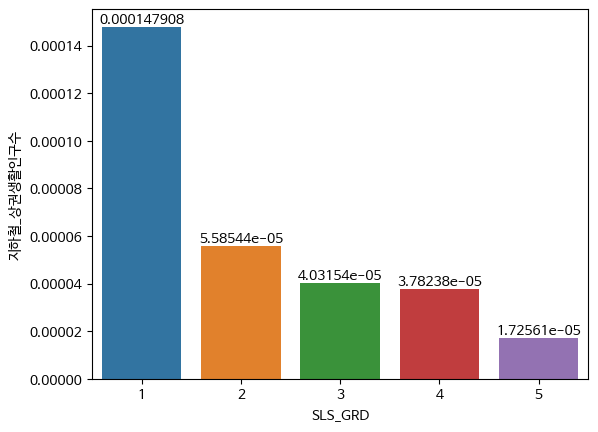

In [ ]:
# 지하철을 상권집객시설수로 나누자 2,3,4 등급의 값들이 높은 수치를 보이고 있음

data['지하철_상권생활인구수'] = data['subway_counts'] / data['상권_총_생활인구_수']
tmp = data.groupby(['SLS_GRD']).agg({'지하철_상권생활인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="지하철_상권생활인구수")
ax.bar_label(ax.containers[0])

plt.show()

# [4] sisul_counts

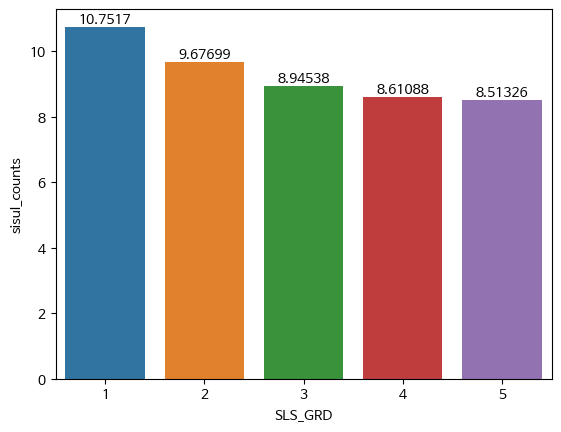

In [ ]:
# 등급이 높을수록(안정적일수록) 시설(공원, 대형마트 등)의 갯수는 많음
a = data.groupby(['SLS_GRD']).agg({'sisul_counts':'mean'}).reset_index()
ax = sns.barplot(data=a, x="SLS_GRD", y="sisul_counts")

ax.bar_label(ax.containers[0])

plt.show()

## [4-1] 시설_상권집객시설수 (sisul_counts / 상권_집객시설_수)  **<사용>**

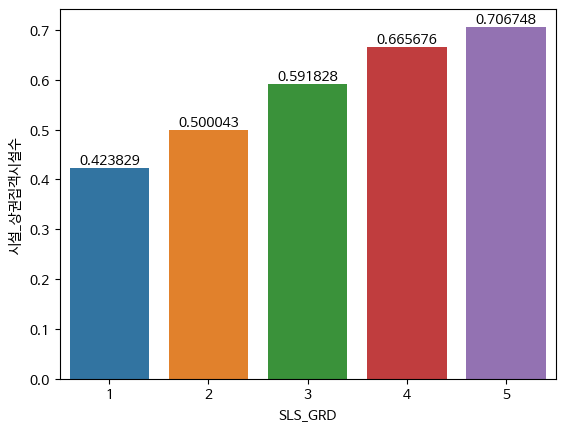

In [ ]:
#

data['시설_상권집객시설수'] = data['sisul_counts'] / data['상권_집객시설_수']
tmp = data.groupby(['SLS_GRD']).agg({'시설_상권집객시설수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="시설_상권집객시설수")
ax.bar_label(ax.containers[0])

plt.show()

## [4-2] 시설_상권집객시설수 (sisul_counts / 상권_총_상주인구_수)  **<사용>**

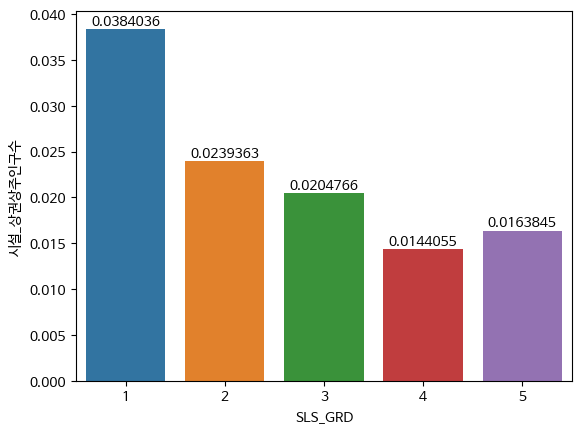

In [ ]:
#
data['시설_상권상주인구수'] = data['sisul_counts'] / data['상권_총 상주인구 수']
tmp = data.groupby(['SLS_GRD']).agg({'시설_상권상주인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="시설_상권상주인구수")
ax.bar_label(ax.containers[0])

plt.show()

## [4-3] 시설_상권집객시설수 (sisul_counts / 상권_총_생활인구_수) **<사용>**

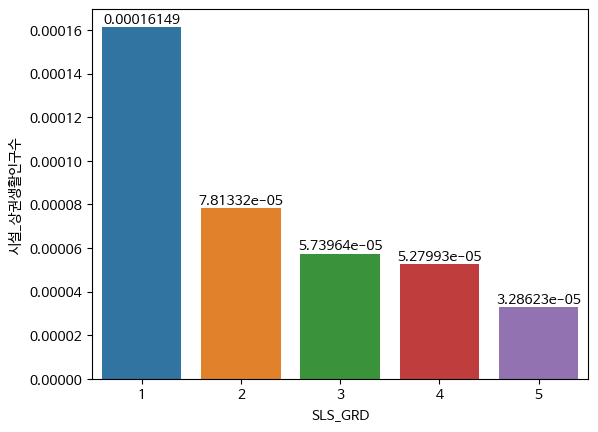

In [ ]:
#

data['시설_상권생활인구수'] = data['sisul_counts'] / data['상권_총_생활인구_수']
tmp = data.groupby(['SLS_GRD']).agg({'시설_상권생활인구수':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="시설_상권생활인구수")
ax.bar_label(ax.containers[0])

plt.show()

# [5] 공시지가

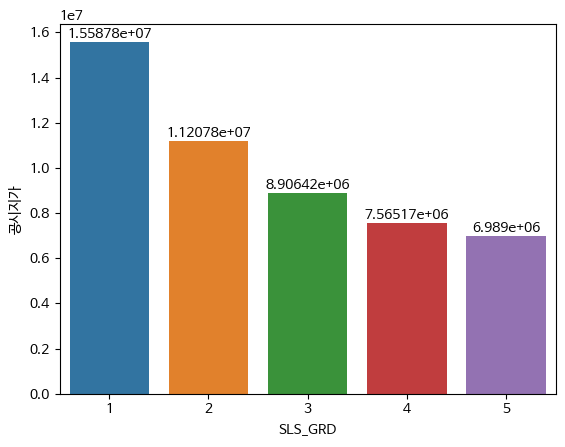

In [ ]:
# 등급이 안정적일수록 공시지가 또한 비싸다 (예상에서 벗어나지 않음)
a = data.groupby(['SLS_GRD']).agg({'공시지가':'mean'}).reset_index()
ax = sns.barplot(data=a, x="SLS_GRD", y="공시지가")

ax.bar_label(ax.containers[0])

plt.show()

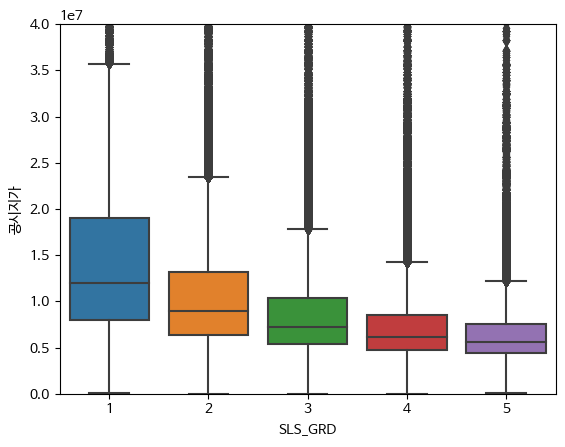

In [ ]:
# 1번 타겟값의 공시지가가 평균적으로 높으며, 그 범위도 다른 지역에 비해 넓은 편이다.
sns.boxplot(data=data, x="SLS_GRD", y="공시지가").set(ylim = (0,40000000))

plt.show()

## [5-1] 배후지소득대비공시지가 (공시지가 / 배후지_월_평균_소득_금액)  **<사용>**

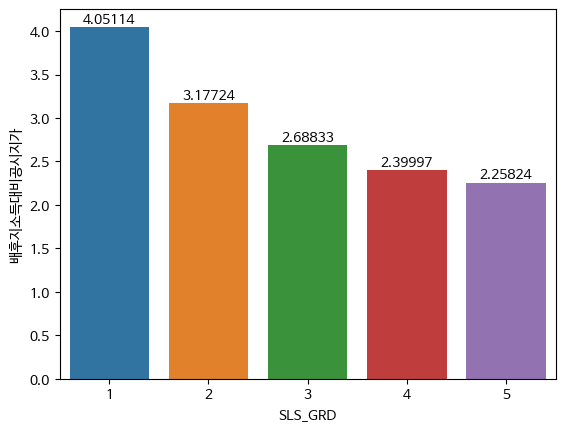

In [ ]:
data['배후지소득대비공시지가'] = data['공시지가'] / data['배후지_월_평균_소득_금액']
tmp = data.groupby(['SLS_GRD']).agg({'배후지소득대비공시지가':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="배후지소득대비공시지가")
ax.bar_label(ax.containers[0])

plt.show()

## [5-2] 배후지총지출대비공시지가 (공시지가 / 배후지_지출_총금액)  **<사용>**

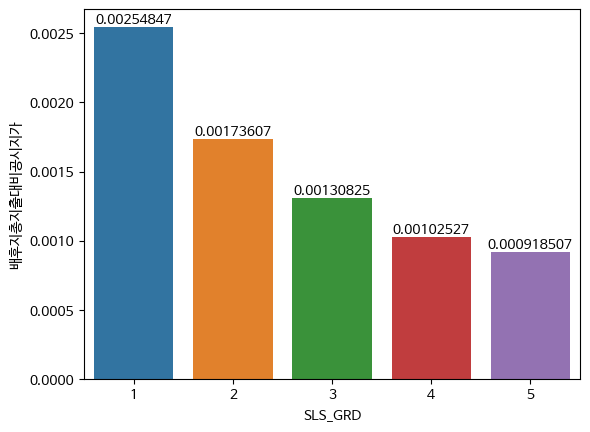

In [ ]:
data['배후지총지출대비공시지가'] = data['공시지가'] / data['배후지_지출_총금액']
tmp = data.groupby(['SLS_GRD']).agg({'배후지총지출대비공시지가':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="배후지총지출대비공시지가")
ax.bar_label(ax.containers[0])

plt.show()

## [5-3] 배후지식료품대비공시지가 (공시지가 / 배후지_식료품_지출_총금액)  **<사용>**

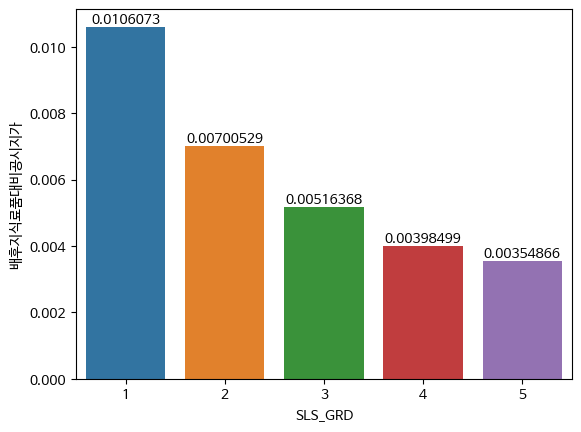

In [ ]:
data['배후지식료품대비공시지가'] = data['공시지가'] / data['배후지_식료품_지출_총금액']
tmp = data.groupby(['SLS_GRD']).agg({'배후지식료품대비공시지가':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="배후지식료품대비공시지가")
ax.bar_label(ax.containers[0])

plt.show()

## [5-4] 배후지개업율공시지가 (공시지가 / 배후지_개업_율)  **<미사용>**
- 개업율의 피처중요도 낮았고, 위의 피쳐들과 의미가 겹치는듯

In [ ]:
data['배후지_개업_율']

0         1.66667
1         0.00000
2         0.00000
3         0.00000
4         3.33333
            ...  
1156035   3.40000
1156036   3.40000
1156037   3.40000
1156038   3.40000
1156039   3.40000
Name: 배후지_개업_율, Length: 1156040, dtype: float64

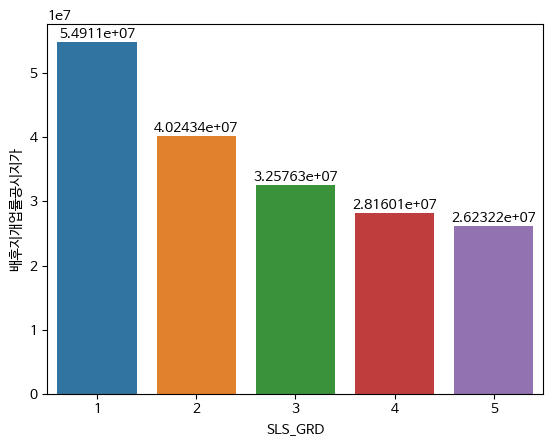

In [ ]:
data['배후지개업률공시지가'] = data['공시지가'] * data['배후지_개업_율']
tmp = data.groupby(['SLS_GRD']).agg({'배후지개업률공시지가':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="배후지개업률공시지가")
ax.bar_label(ax.containers[0])

plt.show()

## [5-5] 배후지폐업율대비공시지가 (공시지가 / '배후지_폐업_률') **<미사용>**
- 개업율의 피처중요도 낮았고, 위의 피쳐들과 의미가 겹치는듯

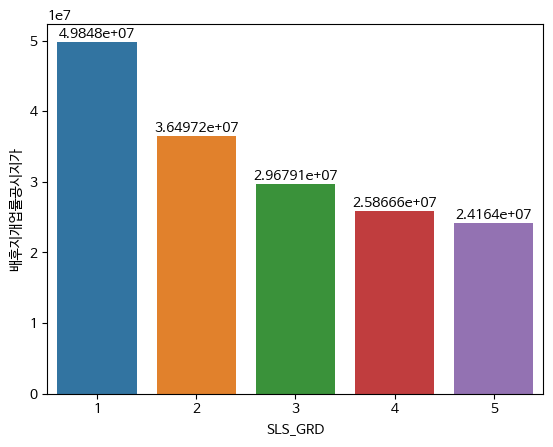

In [ ]:
data['배후지개업률공시지가'] = data['공시지가'] * data['배후지_폐업_률']
tmp = data.groupby(['SLS_GRD']).agg({'배후지개업률공시지가':'mean'}).reset_index()

ax = sns.barplot(data=tmp, x="SLS_GRD", y="배후지개업률공시지가")
ax.bar_label(ax.containers[0])

plt.show()

# [6] 횡단보도갯수
- 버스, 지하철과 유사하게 교통접근성 측면에서 의미를 가질것으로 유추

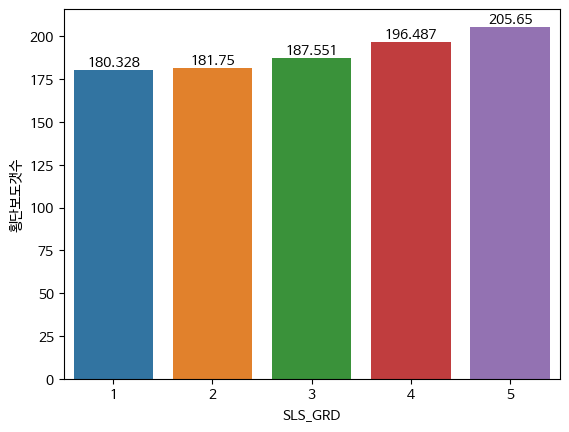

In [ ]:
a = data.groupby(['SLS_GRD']).agg({'횡단보도갯수':'mean'}).reset_index()
ax = sns.barplot(data=a, x="SLS_GRD", y="횡단보도갯수")

ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
tmp = data.groupby(['구']).agg({'횡단보도갯수':'mean'}).reset_index()

tmp = pd.merge(tmp, seoul_df_unique, how='left', left_on='구', right_on = '시군구코드')
tmp = tmp.sort_values(by = '횡단보도갯수')
tmp.head(3)

,구,횡단보도갯수,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
0,11110,20.79895,11,서울특별시,11110,종로구,1111000000,,,19880423,
1,11140,51.07326,11,서울특별시,11140,중구,1114000000,,,19880423,
2,11170,52.57812,11,서울특별시,11170,용산구,1117000000,,,19880423,


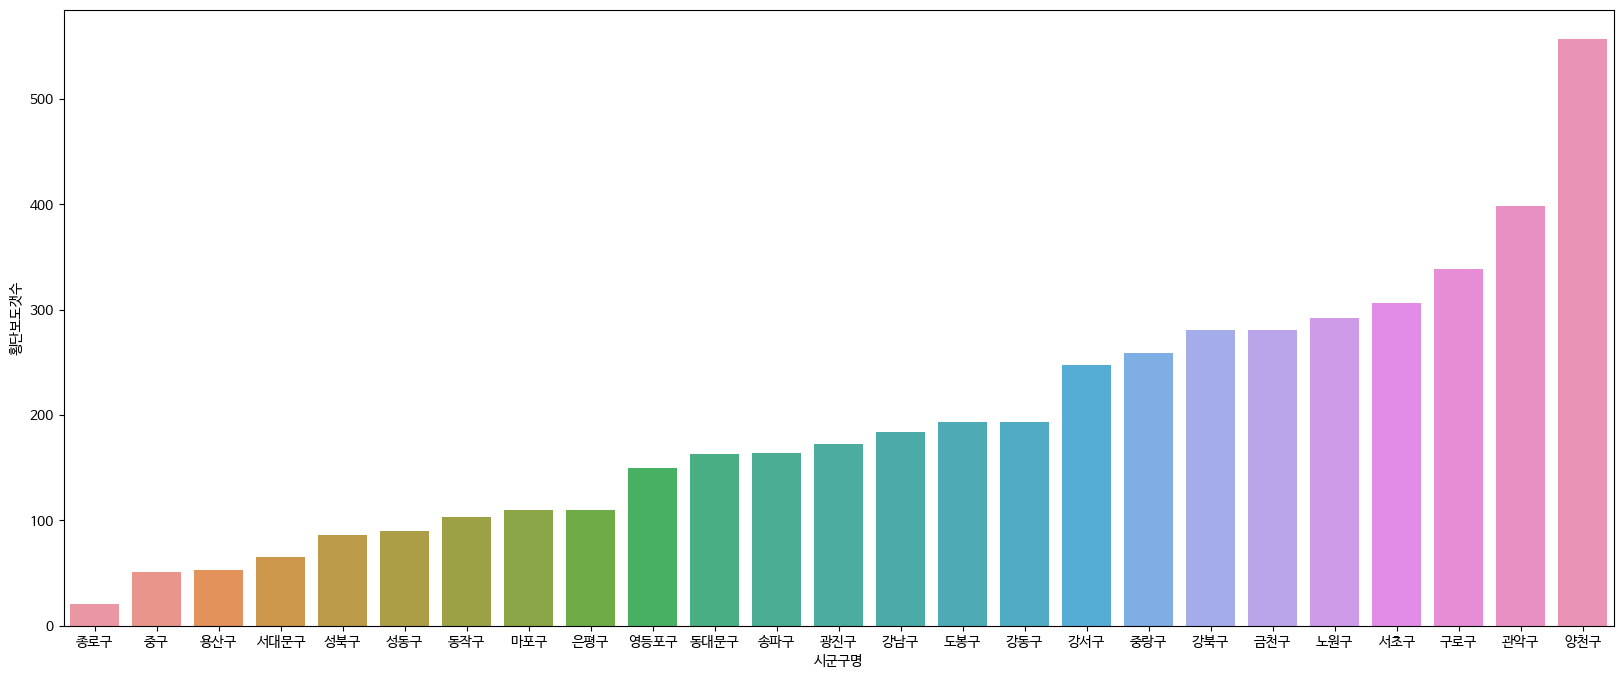

In [ ]:
# 구별로 평균 등급 => 낮을수록 안정적인 지표임
fig, _ = plt.subplots(figsize=(20, 8))

sns.barplot(data=tmp, x="시군구명", y="횡단보도갯수")


plt.show()

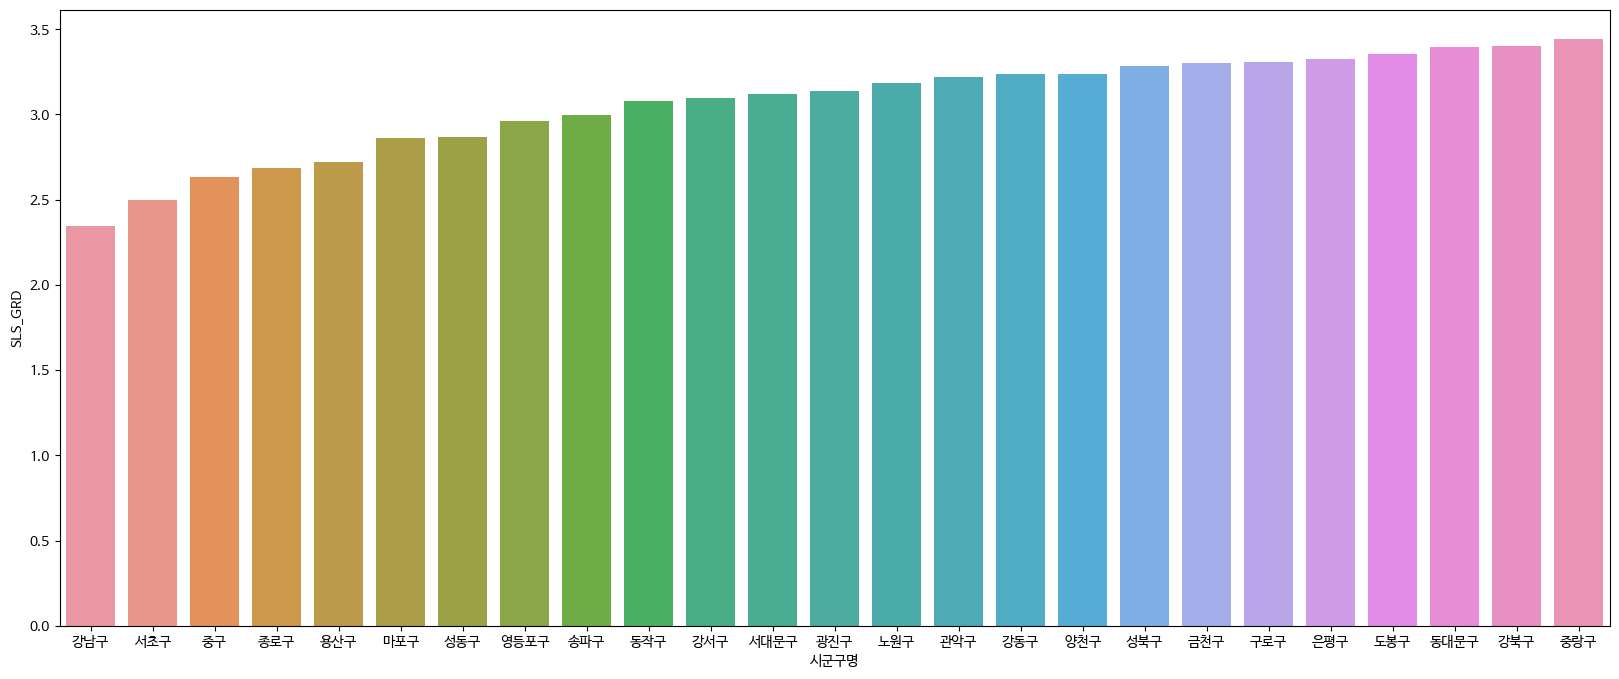

In [ ]:
tmp = data.groupby(['구']).agg({'SLS_GRD':'mean'}).reset_index()
tmp = pd.merge(tmp, seoul_df_unique, how='left', left_on='구', right_on = '시군구코드')
tmp = tmp.sort_values(by = 'SLS_GRD')
# 구별로 평균 등급 => 낮을수록 안정적인 지표임
fig, _ = plt.subplots(figsize=(20, 8))

sns.barplot(data=tmp, x="시군구명", y="SLS_GRD")

plt.show()

## [6-1] 횡단보도버스 (횡단보도갯수 * bus_counts) **<사용>**

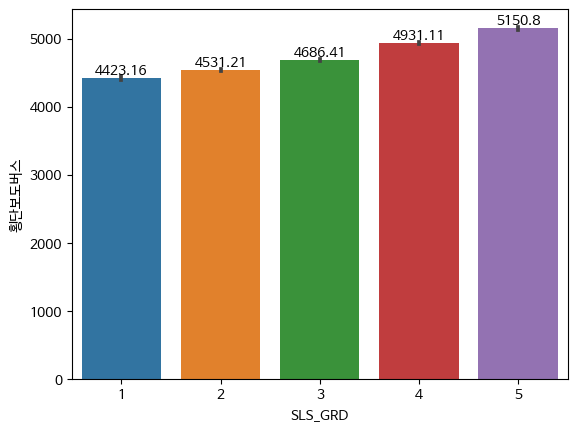

In [ ]:
data['횡단보도버스'] = data['횡단보도갯수'] * data['bus_counts']
tmp = data.groupby(['SLS_GRD']).agg({'횡단보도버스':'mean'}).reset_index()

ax = sns.barplot(data=data, x="SLS_GRD", y="횡단보도버스")
ax.bar_label(ax.containers[0])

plt.show()

## [6-2] 횡단보도지하철 (횡단보도갯수 * subway_counts) **<사용>**

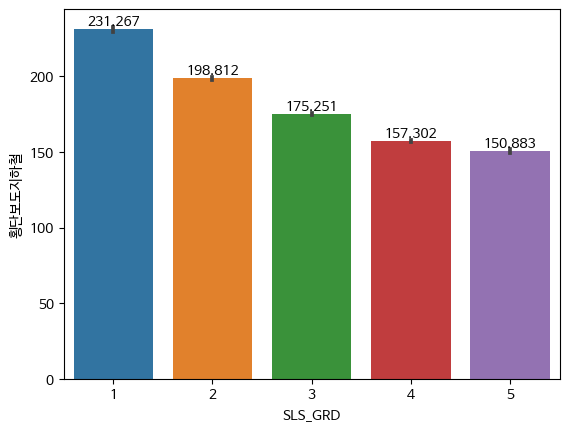

In [ ]:
# 위에서부터 지속해서 보이듯, 지하철과 버스는 반대되는 양상을 보임
data['횡단보도지하철'] = data['횡단보도갯수'] * data['subway_counts']
tmp = data.groupby(['SLS_GRD']).agg({'횡단보도지하철':'mean'}).reset_index()

ax = sns.barplot(data=data, x="SLS_GRD", y="횡단보도지하철")
ax.bar_label(ax.containers[0])

plt.show()

# [7] 운영영업개월, 폐업개월 정리
- 피처 생성후 '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균' 는 삭제

## [7-1] 전체대비_운영영업개월 **<사용>**

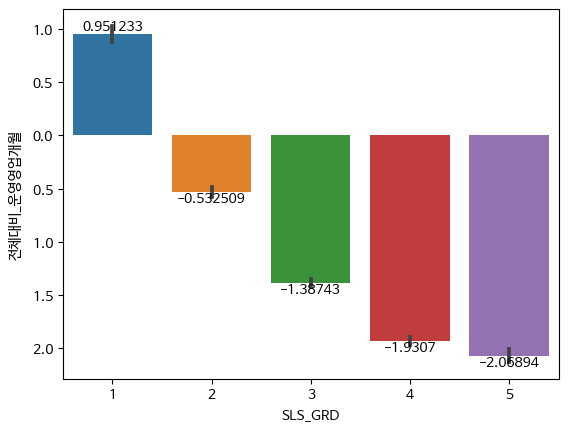

In [ ]:
# 위에서부터 지속해서 보이듯, 지하철과 버스는 반대되는 양상을 보임
data['전체대비_운영영업개월'] = data['운영_영업_개월_평균'] - data['서울_운영_영업_개월_평균']
tmp = data.groupby(['SLS_GRD']).agg({'전체대비_운영영업개월':'mean'}).reset_index()

ax = sns.barplot(data=data, x="SLS_GRD", y="전체대비_운영영업개월")
ax.bar_label(ax.containers[0])

plt.show()

## [7-2] 전체대비_운영폐업개월 **<사용>**

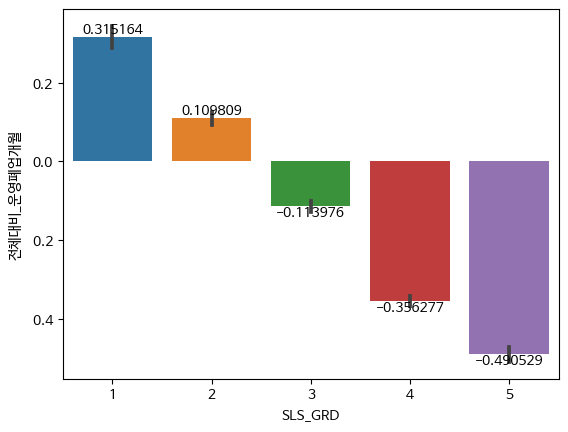

In [ ]:
# 위에서부터 지속해서 보이듯, 지하철과 버스는 반대되는 양상을 보임
data['전체대비_운영폐업개월'] = data['폐업_영업_개월_평균'] - data['서울_폐업_영업_개월_평균']
tmp = data.groupby(['SLS_GRD']).agg({'전체대비_운영폐업개월':'mean'}).reset_index()

ax = sns.barplot(data=data, x="SLS_GRD", y="전체대비_운영폐업개월")
ax.bar_label(ax.containers[0])

plt.show()

## [7-3] 운영폐업_영업개월평균 ('운영_영업_개월_평균', '폐업_영업_개월_평균 ) -> 평균 **<미사용>**

- 등급별 큰 차이가 없음. 원래 피처중요도도 낮았기 때문에 미사용 건의

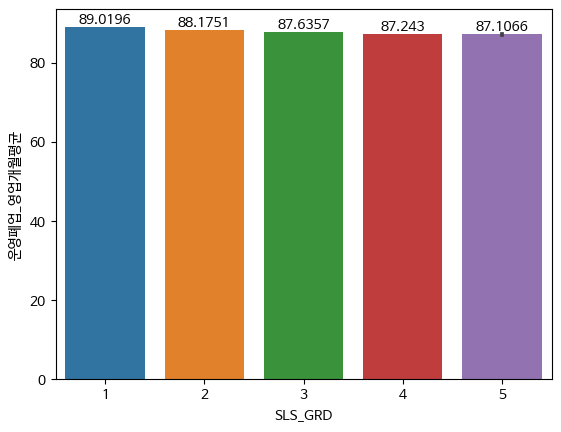

In [ ]:
# 위에서부터 지속해서 보이듯, 지하철과 버스는 반대되는 양상을 보임
data['운영폐업_영업개월평균'] = (data['운영_영업_개월_평균']+data['폐업_영업_개월_평균']) / 2
tmp = data.groupby(['SLS_GRD']).agg({'운영폐업_영업개월평균':'mean'}).reset_index()

ax = sns.barplot(data=data, x="SLS_GRD", y="운영폐업_영업개월평균")
ax.bar_label(ax.containers[0])

plt.show()

# [8] 기타 EDA

## [8-1] 매출 건당 평균 금액

- [상권_분기당_매출_금액] / [상권_분기당_매출_건수]

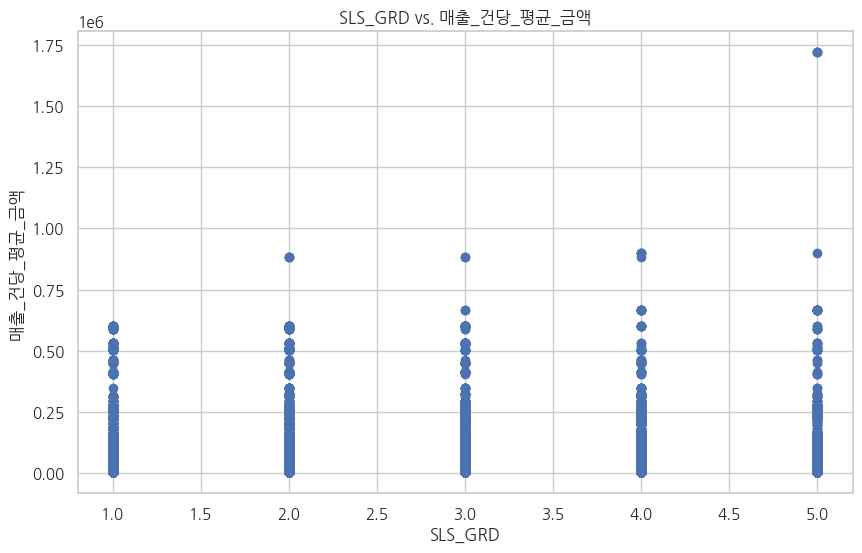

In [17]:
# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (선택 사항)

# Matplotlib을 사용한 경우
plt.scatter(data['SLS_GRD'], data['매출_건당_평균_금액'])
plt.xlabel('SLS_GRD')
plt.ylabel('매출_건당_평균_금액 ')
plt.title('SLS_GRD vs. 매출_건당_평균_금액')

# Seaborn을 사용한 경우
# sns.scatterplot(data=data, x='SLS_GRD', y='매출_건당_평균_금액')
# plt.title('SLS_GRD vs. 매출_건당_평균_금액')

plt.show()

## [8-2] # 주중 매출 비율 시각화

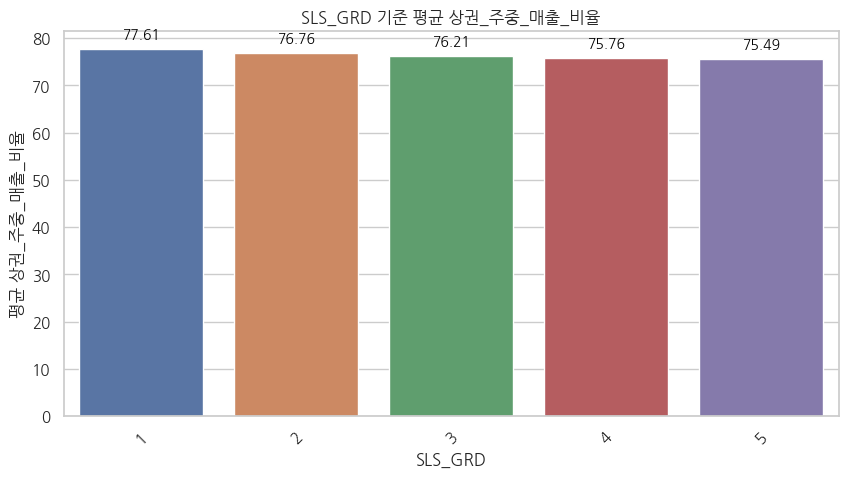

In [19]:
# '상권_주중_매출_비율' 피처의 평균을 'SLS_GRD' 기준으로 그룹화
grouped_data_weekday = data.groupby('SLS_GRD')['상권_주중_매출_비율'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=grouped_data_weekday, x='SLS_GRD', y='상권_주중_매출_비율')
plt.xlabel('SLS_GRD')
plt.ylabel('평균 상권_주중_매출_비율')
plt.title('SLS_GRD 기준 평균 상권_주중_매출_비율')

# 막대 위에 라벨(수치값) 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

## [8-3] 주말 매출 비율 시각화

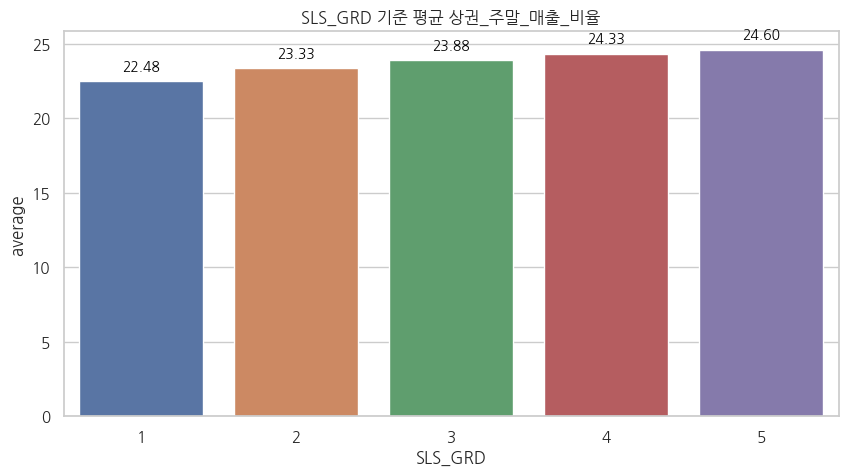

In [15]:
# '상권_주말_매출_비율' 피처의 평균을 'SLS_GRD' 기준으로 그룹화
grouped_data = data.groupby('SLS_GRD')['상권_주말_매출_비율'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=grouped_data, x='SLS_GRD', y='상권_주말_매출_비율')
plt.xlabel('SLS_GRD')
plt.ylabel('average ')
plt.title('SLS_GRD 기준 평균 상권_주말_매출_비율')

# 막대 위에 라벨(수치값) 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

## [8-4] '상권_월._평균_소득_금액'의 평균 시각화

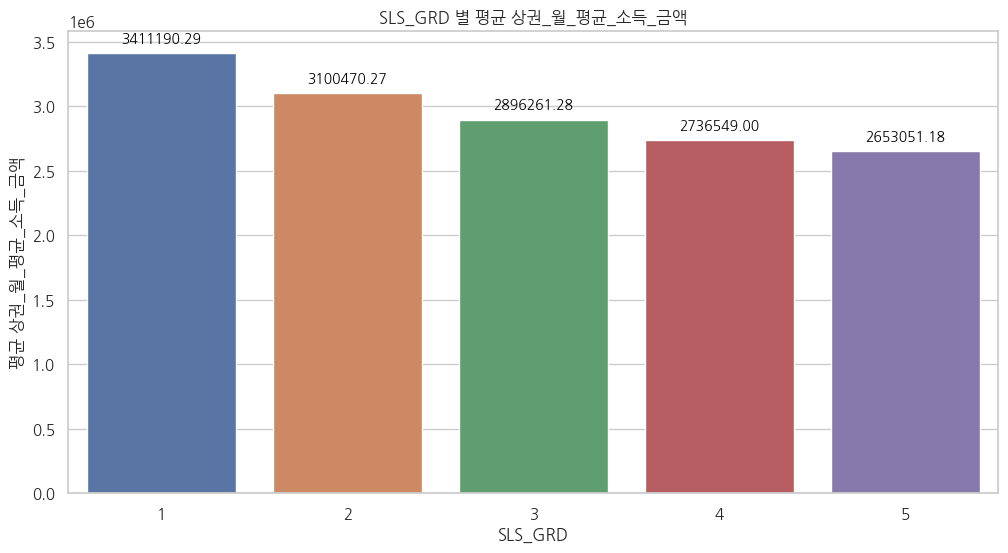

In [20]:
# 'SLS_GRD' 별 '상권_월_평균_소득_금액'의 평균 계산
income_by_grd = data.groupby('SLS_GRD')['상권_월_평균_소득_금액'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=income_by_grd, x='SLS_GRD', y='상권_월_평균_소득_금액')
plt.xlabel('SLS_GRD')
plt.ylabel('평균 상권_월_평균_소득_금액')
plt.title('SLS_GRD 별 평균 상권_월_평균_소득_금액')
plt.xticks(rotation=0)

# 막대 위에 라벨(수치값) 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()

## [8-5] '상권_지출_총금액'의 평균 시각화

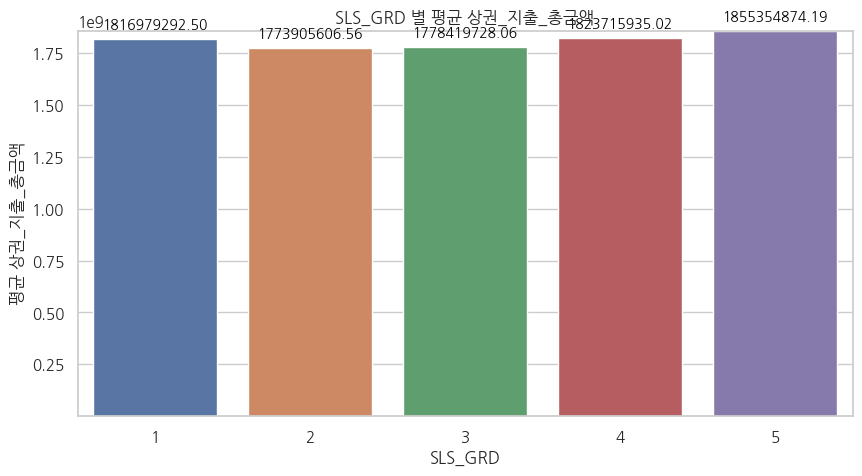

In [22]:
# 'SLS_GRD' 별 '상권_지출_총금액'의 평균을 계산하고 그룹화
grouped_data = data.groupby('SLS_GRD')['상권_지출_총금액'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=grouped_data, x='SLS_GRD', y='상권_지출_총금액')
plt.xlabel('SLS_GRD')
plt.ylabel('평균 상권_지출_총금액')
plt.title('SLS_GRD 별 평균 상권_지출_총금액')

# 막대 위에 라벨(수치값) 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.ylim(np.min(grouped_data.values),np.max(grouped_data.values))
plt.xticks(rotation=0)
plt.show()

## [8-6] 상권_분기당_매출_금액의 평균

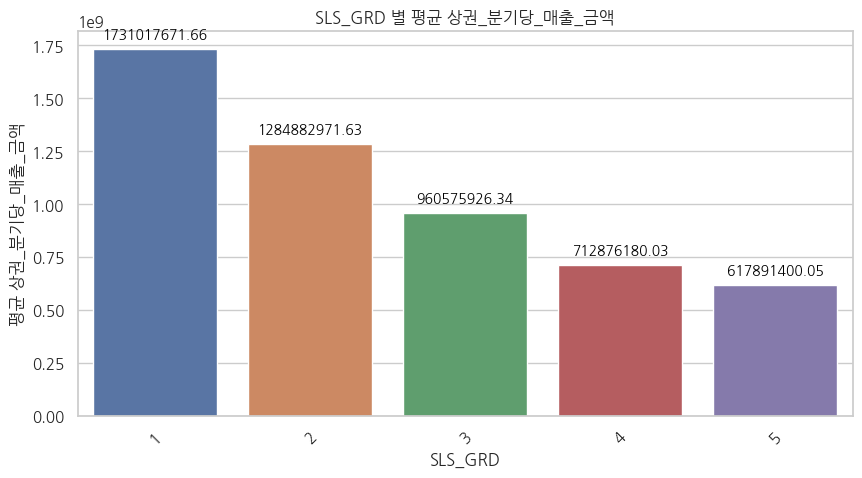

In [23]:
# 'SLS_GRD' 별 '상권_분기당_매출_금액'의 평균을 계산

grouped_data = data.groupby('SLS_GRD')['상권_분기당_매출_금액'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=grouped_data, x='SLS_GRD', y='상권_분기당_매출_금액')
plt.xlabel('SLS_GRD')
plt.ylabel('평균 상권_분기당_매출_금액')
plt.title('SLS_GRD 별 평균 상권_분기당_매출_금액')

# 막대 위에 라벨(수치값) 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

## [8-7] 상권_분기당_공시지가의 평균

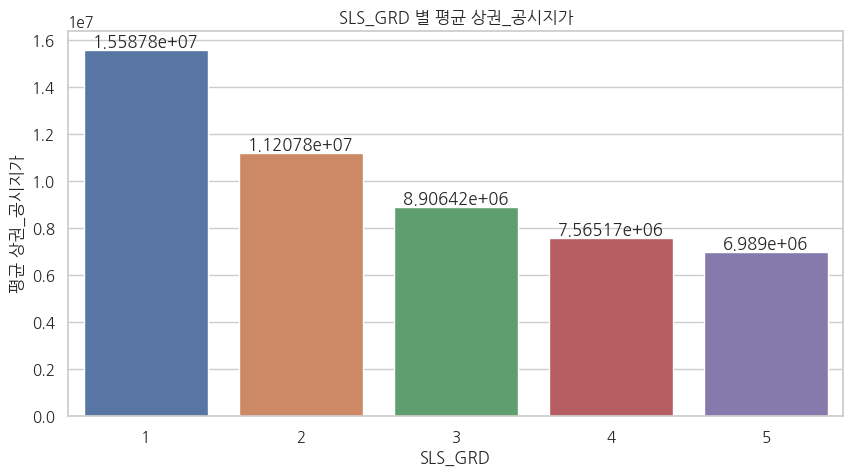

In [26]:
plt.figure(figsize=(10, 5))

a = data.groupby(['SLS_GRD']).agg({'공시지가':'mean'}).reset_index()

ax = sns.barplot(data=a, x="SLS_GRD", y="공시지가")

ax.bar_label(ax.containers[0])

plt.xlabel('SLS_GRD')
plt.ylabel('평균 상권_공시지가')
plt.title('SLS_GRD 별 평균 상권_공시지가')

plt.show()

# [9] 기타

## [9-1] 시간에 따른 배후지칼럼 변화 확인

In [28]:
hinter_col = [col for col in data.columns if col.startswith('배후지')]

IndexError: index 14 is out of bounds for axis 0 with size 14

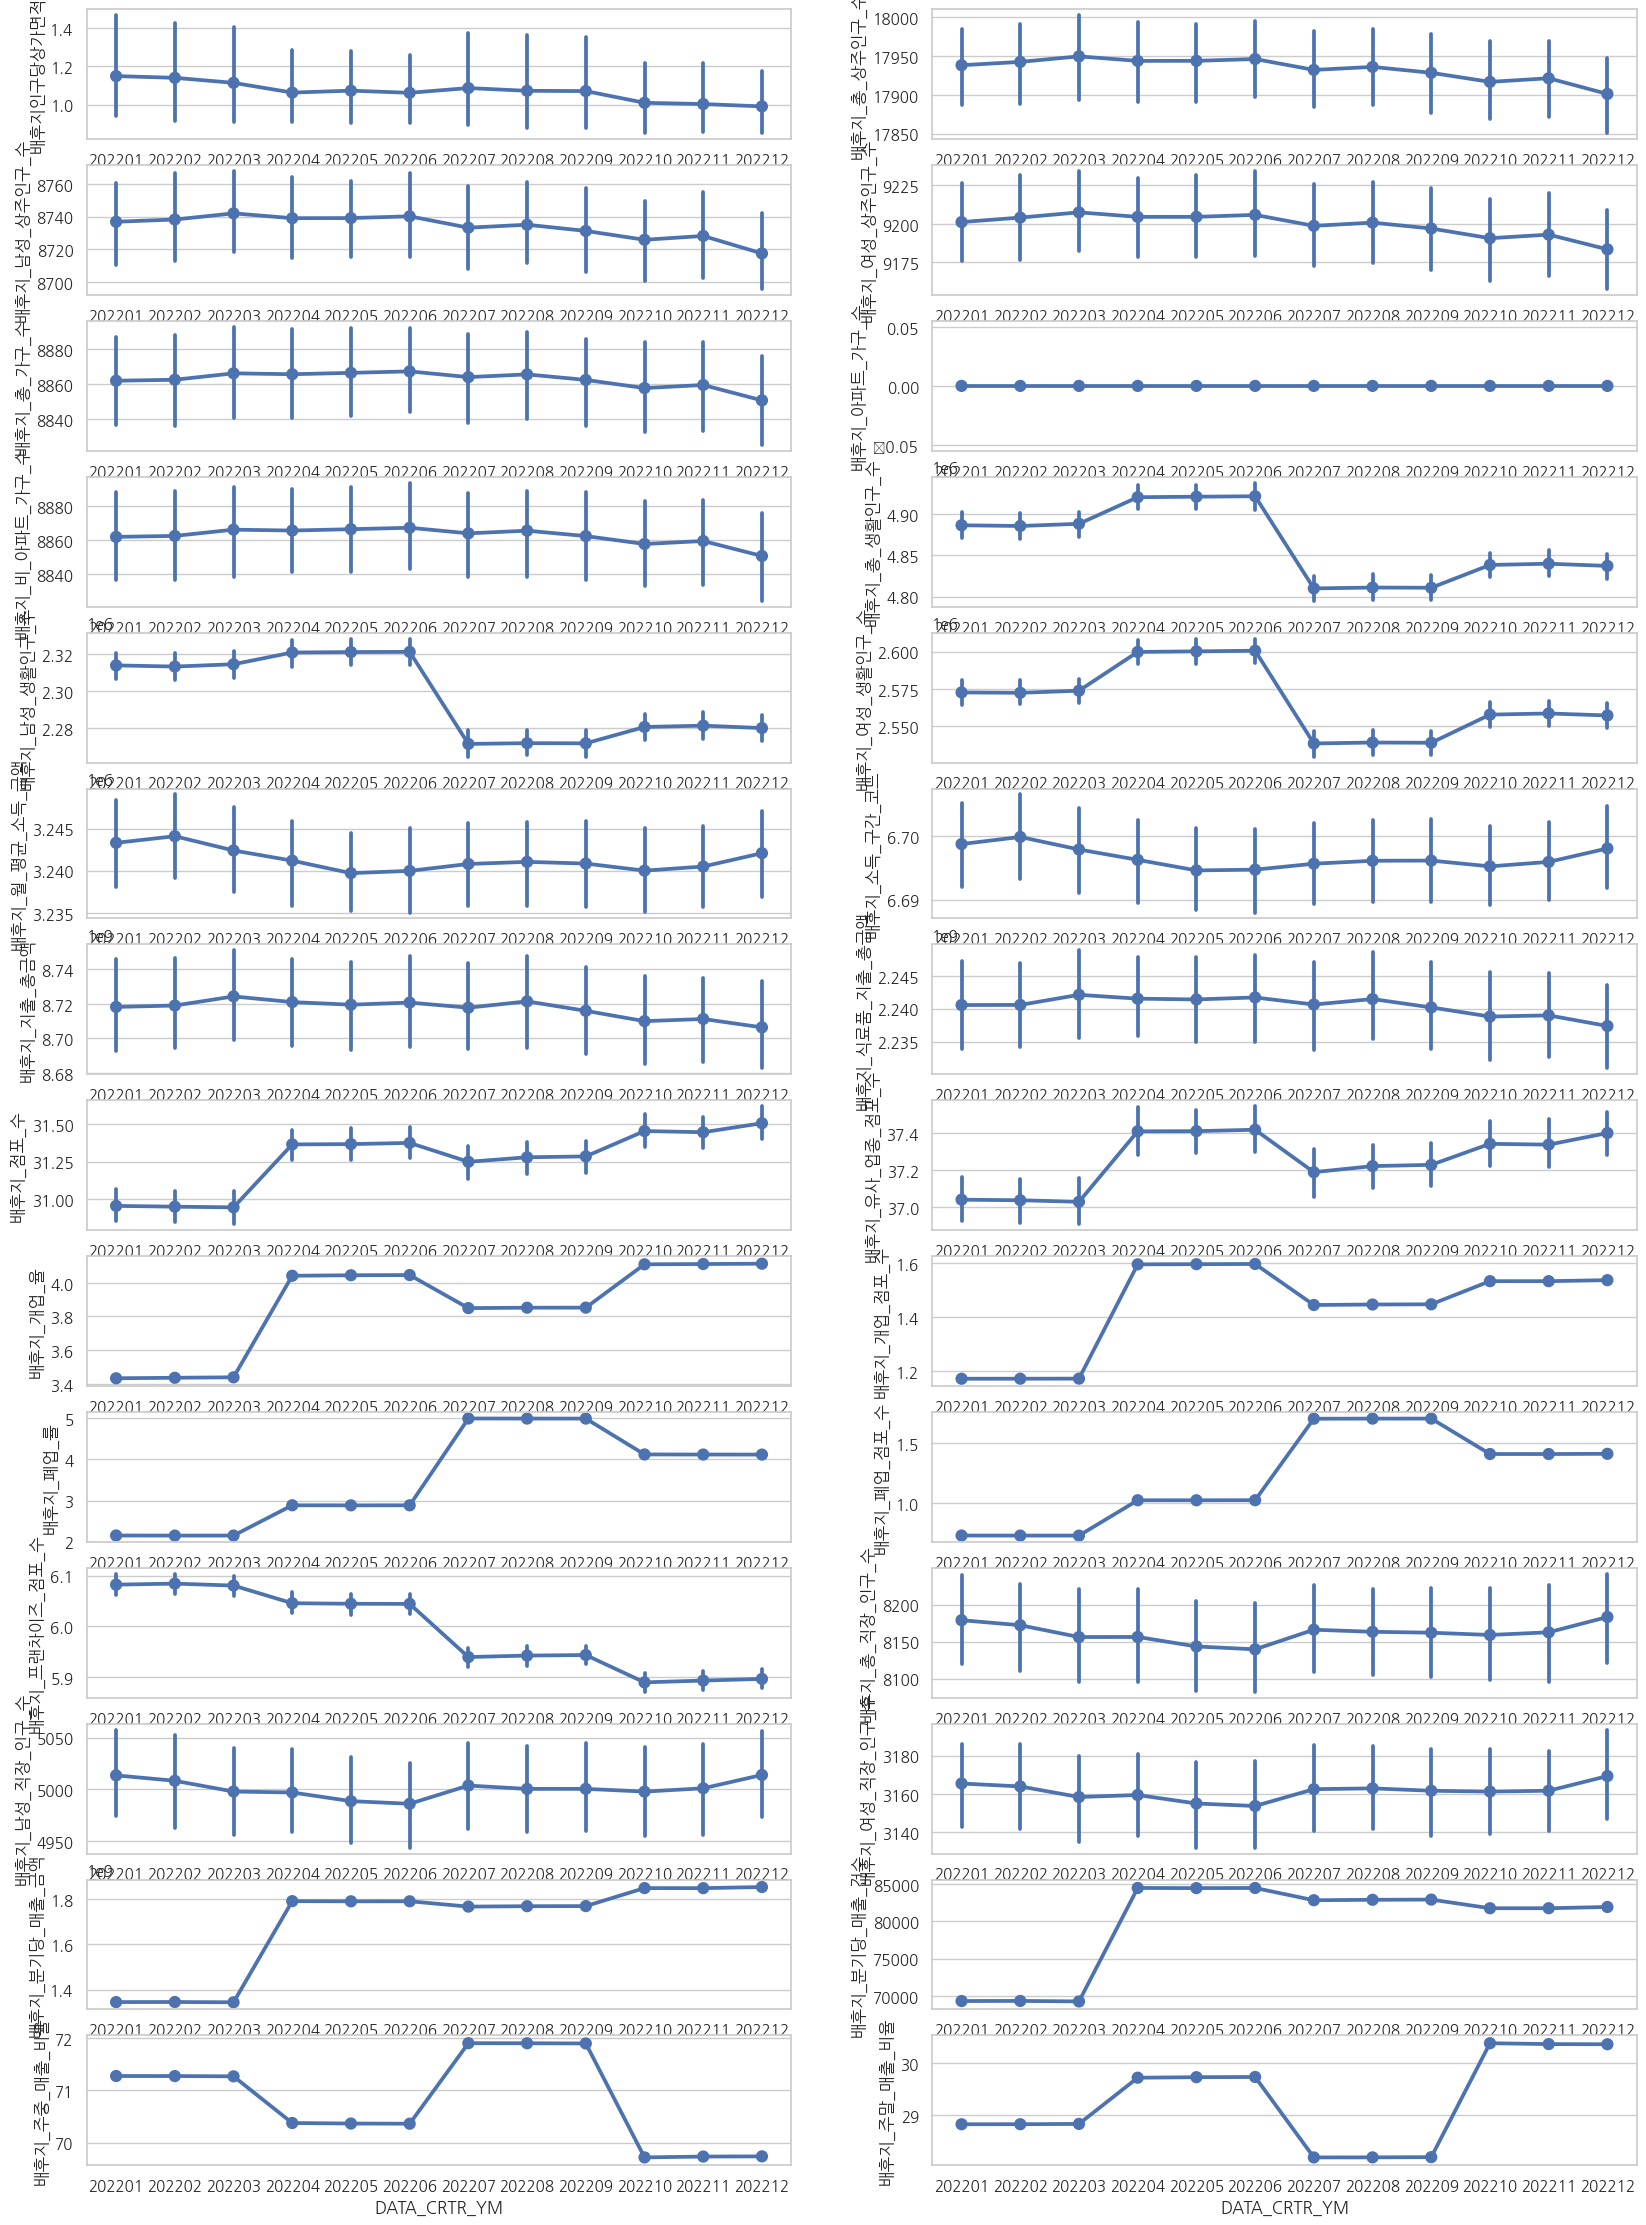

In [31]:
fig, axes = plt.subplots(nrows = 14, ncols = 2, figsize = (20, 28))

for idx, col in enumerate(hinter_col):
    COLS = idx % 2
    ROWS = idx // 2
    line_df = data[['DATA_CRTR_YM', col]]
    sns.pointplot( data = line_df, x = 'DATA_CRTR_YM', y = col, ax = axes[ROWS, COLS])
    # plt.ylim(np.min(line_df[col].values)*0.99)

plt.tight_layout()
plt.show()

## [9-2] 배후지 가구당 상주인구 수

- 배후지_총_상주인구_수 / 배후지_총_가구_수
- 1인가구 -> 2인 -> 3인-> 4인
= 지역별 가구 분포

<Axes: ylabel='Frequency'>

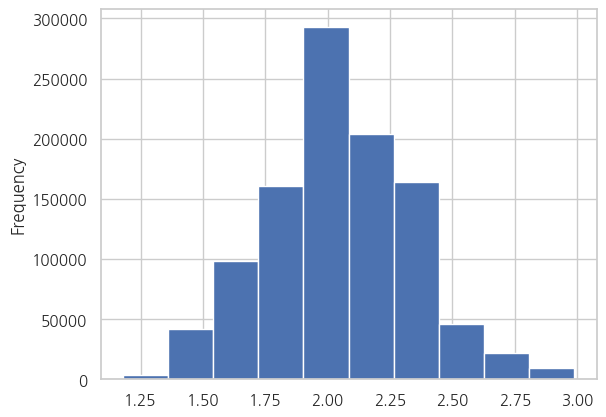

In [32]:
data['배후지_가구당_인구수'] = data['배후지_총_상주인구_수'] / data['배후지_총_가구_수']
data['배후지_가구당_인구수'].plot.hist()

<Axes: xlabel='배후지_가구당_인구수', ylabel='Density'>

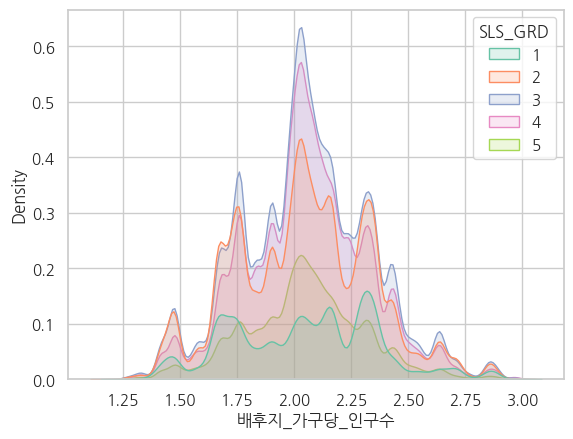

In [33]:
sns.kdeplot(data = data, x = '배후지_가구당_인구수', hue = 'SLS_GRD', alpha = 0.2, fill = True, palette = 'Set2')

## [9-3] 배후지 남여성비

<Axes: xlabel='SLS_GRD', ylabel='배후지_여성_남성_상대비'>

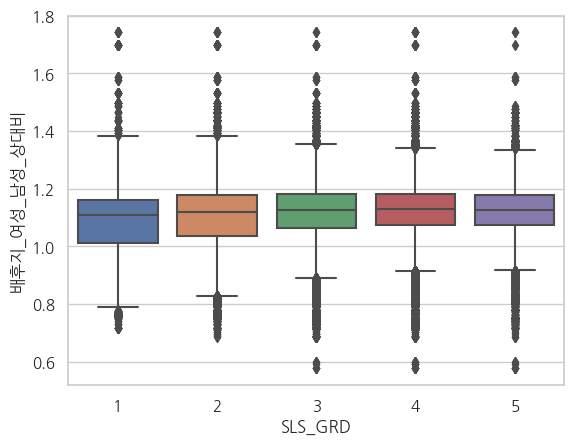

In [34]:
data['배후지_남성_생활인구_비율'] = data['배후지_남성_생활인구_수'] / data['배후지_총_생활인구_수']
data['배후지_여성_생활인구_비율'] = data['배후지_여성_생활인구_수'] / data['배후지_총_생활인구_수']
data['배후지_여성_남성_상대비'] = data['배후지_여성_생활인구_수'] / data['배후지_남성_생활인구_수']

sns.boxplot(data = data, x= 'SLS_GRD', y = '배후지_여성_남성_상대비')

## [9-4] 배후지_월_평균_소득_금액 - 배후지_지출_총금액

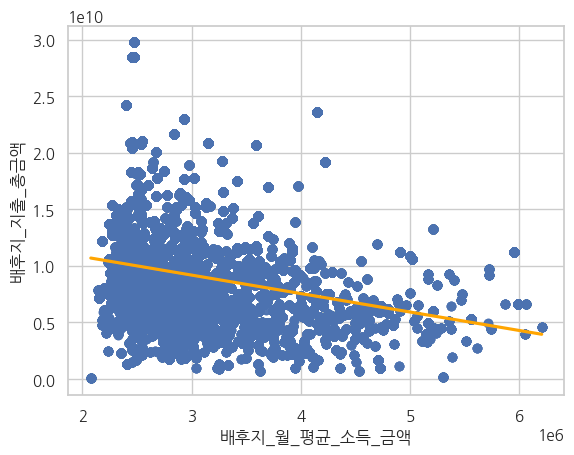

In [35]:
h_sample = data.sample(frac = 0.2, weights = 'SLS_GRD', random_state = 0)

sns.regplot(data = h_sample, x = '배후지_월_평균_소득_금액', y = '배후지_지출_총금액', line_kws = {'color':'orange'})
plt.show()